# astropy and HR diagrams - BLANK
welcome to week 4! this tutorial will walk you through creating your own HR diagram with real data!

here are the overall steps we will follow to do this.
1. download data
2. set up notebook - import libraries and read in data
3. sort data
4. plot data

**download data**

will be using data from the MIST Track Interpolator for this tutorial. i have already generated the data for you, so you can download it from [here](https://drive.google.com/drive/folders/1VK02s6-oMZvxxx6AXui4Ec0NVZQtpa8f?usp=share_link). you will need to read the [MIST documentation](https://waps.cfa.harvard.edu/MIST/README_tables.pdf) to understand the structure of the dataset and how to use it.

**import libraries**

we will need astropy to process data, numpy to work with numbers, and matplotlib for plots

In [3]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

**read in the datasets for each evolutionary track.** 
note that you may have to set the header_start parameter differently depending on how it was saved, so play around with it and check by printing the table to see that you've set it correctly

In [6]:
low_mass_pathname = '/Users/komalkaur/Desktop/coffies reu/bootcamp/matplotlib and astropy/MIST_eep_666800175f630/0010000M.track.eep'    # enter the pathname of where you stored the dataset EXACTLY
low_mass = Table.read(low_mass_pathname, format='ascii', header_start=-1)
low_mass

star_age,star_mass,star_mdot,he_core_mass,c_core_mass,o_core_mass,log_L,log_L_div_Ledd,log_LH,log_LHe,log_LZ,log_Teff,log_abs_Lgrav,log_R,log_g,log_surf_z,surf_avg_omega,surf_avg_v_rot,surf_num_c12_div_num_o16,v_wind_Km_per_s,surf_avg_omega_crit,surf_avg_omega_div_omega_crit,surf_avg_v_crit,surf_avg_v_div_v_crit,surf_avg_Lrad_div_Ledd,v_div_csound_surf,surface_h1,surface_he3,surface_he4,surface_li7,surface_be9,surface_b11,surface_c12,surface_c13,surface_n14,surface_o16,surface_f19,surface_ne20,surface_na23,surface_mg24,surface_si28,surface_s32,surface_ca40,surface_ti48,surface_fe56,log_center_T,log_center_Rho,center_degeneracy,center_omega,center_gamma,mass_conv_core,center_h1,center_he4,center_c12,center_n14,center_o16,center_ne20,center_mg24,center_si28,pp,cno,tri_alfa,burn_c,burn_n,burn_o,c12_c12,delta_nu,delta_Pg,nu_max,acoustic_cutoff,max_conv_vel_div_csound,max_gradT_div_grada,gradT_excess_alpha,min_Pgas_div_P,max_L_rad_div_Ledd,e_thermal,phase
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1766.3678606792855,0.9999999320431258,-3.390086368309726e-11,0.0,0.0,0.0,1.7476912475046316,-3.500185315260042,-5.144278324283165,-98.99999999999999,-98.99999999999999,3.611216677878353,1.7476938574672918,1.1740894201777239,2.0899673476906155,-1.8450995223420104,0.0,0.0,0.5448971966897287,5.244781499663982e-05,0.0,0.0,0.0,0.0,0.0,-3.1135551840465718e-06,0.715400082181477,4.486234786924041e-05,0.2702550818871746,9.872581069872557e-09,1.6897787998392068e-10,0.0,0.0024965327121986105,3.030475308304069e-05,0.0007372884268855006,0.00610887760692021,5.391681858040579e-07,0.001239176882629011,3.122781669657157e-05,0.0005895641007761098,0.0006526494105762249,0.000313094260949973,6.853515369498784e-05,3.3345960481524565e-06,0.0015846293653174663,5.739245820870222,-2.5001239536992603,-7.122897563196478,0.0,0.06717926114073781,0.9999996997797443,0.715399991999916,0.2702551376470108,0.0024965358274980634,0.0007372893469111921,0.006108885229885848,0.001239182616635962,0.0005895668288488319,0.0006526524305617562,-5.144278324283165,-62.5343177541771,-98.99999999999999,-98.99999999999999,-98.99999999999999,-98.99999999999999,-98.99999999999999,2.34206958045866,0.0,16.5358174355303,150.97029642910596,0.40578414726159384,3.9134005046309883,0.0,0.9990220963737446,0.0015503430116715496,2.044441245846111e+47,-1.0
1860.694700255749,0.9999999288919986,-3.340649032856855e-11,0.0,0.0,0.0,1.7437058149771034,-3.4940133551128367,-5.102419592993743,-98.99999999999999,-98.99999999999999,3.6114623531089536,1.7437081770080627,1.1716053534527588,2.0949354797720283,-1.8450995136689894,0.0,0.0,0.5448971966897287,5.2332335800843844e-05,0.0,0.0,0.0,0.0,0.0,-3.048798306840936e-06,0.7154000814328674,4.486234790963495e-05,0.2702550823456086,9.872581173385435e-09,1.689778817556343e-10,0.0,0.002496532738374469,3.030475340078254e-05,0.000737288434615885,0.006108877670971088,5.391682068716658e-07,0.0012391769310489537,3.122781791677597e-05,0.0005895641238129017,0.0006526494360780296,0.00031309427318390544,6.853515637294952e-05,3.334596178449392e-06,0.0015846294272357153,5.74158436309797,-2.4931322207135236,-7.1145888604575775,0.0,0.06717802914550222,0.9999996995810677,0.7153999919999074,0.2702551376470108,0.002496535827498062,0.0007372893469111916,0.006108885229885845,0.0012391826166359597,0.0005895668288488307,0.0006526524305617549,-5.102419592993743,-62.38260018876218,-98.99999999999999,-98.99999999999999,-98.99999999

In [8]:
high_mass_pathname = '/Users/komalkaur/Desktop/coffies reu/bootcamp/matplotlib and astropy/MIST_eep_666800175f630/2910000M.track.eep'
high_mass = Table.read(high_mass_pathname, format='ascii', header_start=-1)
high_mass

star_age,star_mass,star_mdot,he_core_mass,c_core_mass,o_core_mass,log_L,log_L_div_Ledd,log_LH,log_LHe,log_LZ,log_Teff,log_abs_Lgrav,log_R,log_g,log_surf_z,surf_avg_omega,surf_avg_v_rot,surf_num_c12_div_num_o16,v_wind_Km_per_s,surf_avg_omega_crit,surf_avg_omega_div_omega_crit,surf_avg_v_crit,surf_avg_v_div_v_crit,surf_avg_Lrad_div_Ledd,v_div_csound_surf,surface_h1,surface_he3,surface_he4,surface_li7,surface_be9,surface_b11,surface_c12,surface_c13,surface_n14,surface_o16,surface_f19,surface_ne20,surface_na23,surface_mg24,surface_si28,surface_s32,surface_ca40,surface_ti48,surface_fe56,log_center_T,log_center_Rho,center_degeneracy,center_omega,center_gamma,mass_conv_core,center_h1,center_he4,center_c12,center_n14,center_o16,center_ne20,center_mg24,center_si28,pp,cno,tri_alfa,burn_c,burn_n,burn_o,c12_c12,delta_nu,delta_Pg,nu_max,acoustic_cutoff,max_conv_vel_div_csound,max_gradT_div_grada,gradT_excess_alpha,min_Pgas_div_P,max_L_rad_div_Ledd,e_thermal,phase
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
387.0244074344419,290.9752372294788,-6.946955201000347e-05,0.0,0.0,0.0,6.794317461151644,0.11814123053645162,4.461617598122958,-34.42906842660925,0.46860191119207617,4.643239451466664,6.792291609461891,1.633356979824606,3.6349127114661215,-1.8450984947532265,8.422349798031408e-06,249.67206019026776,0.5448971966897294,1644.9700421223013,1.920151422442106e-05,0.43869181264549695,569.1157812446878,0.43869181264549695,0.7511528441192009,2.142918582653519e-05,0.7153999998259635,4.489052325553723e-05,0.2702551211040979,9.872592922537683e-09,1.6897808285267795e-10,0.0,0.0024965357094458747,3.0304789465835817e-05,0.0007372893120474322,0.00610888494101865,5.391706555438647e-07,0.0012391825588624302,3.122795974021549e-05,0.0005895668013618756,0.0006526524001336049,0.0003130956951246515,6.853546763041964e-05,3.334611322764003e-06,0.001584636623947192,7.461487243103315,-0.6187669299466185,-8.718819124602675,9.24962251899625e-06,0.0053968076262310705,259.0036612842383,0.7153927930691864,0.270255450090365,0.0024954809224652895,0.0007373473031573594,0.00610888475150831,0.001239182580907298,0.0005895669218114159,0.0006526524284129226,4.177000252601419,4.143529342679561,-34.42906842660925,-14.39046745746527,-16.64957999751422,-17.604571114931023,-98.99999999999999,7.164663431697327,0.0,176.75982397647806,512.1524373745835,0.7965744048976058,1.0011533639443337,1.0,0.20270917098188068,0.7805085471161964,1.168500001912056e+53,-1.0
392.95241892400986,290.9748182235762,-6.956390905394266e-05,0.0,0.0,0.0,6.79447430034816,0.11846428791460781,4.47617483777695,-34.37520834568955,0.4838602840974975,4.643713870462593,6.7923641359545694,1.6324865614310078,3.636652923464458,-1.845098494841927,8.458238512431627e-06,250.2175660000246,0.5448971966897294,1649.962349186976,1.9261494839030094e-05,0.4391712671306265,569.7283755810503,0.4391712671306265,0.7511166410287613,2.1102576468953216e-05,0.715399999449151,4.489189110644498e-05,0.2702551210278825,9.872592920345617e-09,1.6897808281515903e-10,0.0,0.0024965357088915577,3.030478945910711e-05,0.0007372893118837287,0.006108884939662268,5.391706554520598e-07,0.0012391825586514338,3.122795973489828e-05,0.0005895668012614899,0.0006526524000224775,0.0003130956950713406,6.853546761875007e-05,3.3346113221962173e-06,0.0015846366236773753,7.462399699545884,-0.6160263040623821,-8.715604264156951,9.289523554325845e-06,0.0053968210899868205,258.9946151845601,0.71539278901998

astropy.Table's colnames method makes it very easy to see the names of the columns without having to print the whole table

In [9]:
print(low_mass.colnames)

['star_age', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'log_L', 'log_L_div_Ledd', 'log_LH', 'log_LHe', 'log_LZ', 'log_Teff', 'log_abs_Lgrav', 'log_R', 'log_g', 'log_surf_z', 'surf_avg_omega', 'surf_avg_v_rot', 'surf_num_c12_div_num_o16', 'v_wind_Km_per_s', 'surf_avg_omega_crit', 'surf_avg_omega_div_omega_crit', 'surf_avg_v_crit', 'surf_avg_v_div_v_crit', 'surf_avg_Lrad_div_Ledd', 'v_div_csound_surf', 'surface_h1', 'surface_he3', 'surface_he4', 'surface_li7', 'surface_be9', 'surface_b11', 'surface_c12', 'surface_c13', 'surface_n14', 'surface_o16', 'surface_f19', 'surface_ne20', 'surface_na23', 'surface_mg24', 'surface_si28', 'surface_s32', 'surface_ca40', 'surface_ti48', 'surface_fe56', 'log_center_T', 'log_center_Rho', 'center_degeneracy', 'center_omega', 'center_gamma', 'mass_conv_core', 'center_h1', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'center_mg24', 'center_si28', 'pp', 'cno', 'tri_alfa', 'burn_c', 'burn_n', 'burn_o', '

**create the plot.** remember we want to make an H-R diagram for both evolutionary tracks. we can differentiate them by using different line markers. we also want to color code for phase to see the end of the main sequence.

In [11]:
# start by filtering data for phase using numpy's 'where' method.
    # phase equal to -1 are pre main sequence
    # phase equal to 0 is main sequence
    # phase greater than or equal to 2 is post main sequence

low_mass_preMS = low_mass[np.where(low_mass['phase'] == -1)]
low_mass_MS = low_mass[np.where(low_mass['phase'] == 0)]
low_mass_postMS = low_mass[np.where(low_mass['phase'] >= 2)]

high_mass_preMS = high_mass[np.where(high_mass['phase'] == -1)]
high_mass_MS = high_mass[np.where(high_mass['phase'] == 0)]
high_mass_postMS = high_mass[np.where(high_mass['phase'] >= 2)]

# we now have six datasets to plot

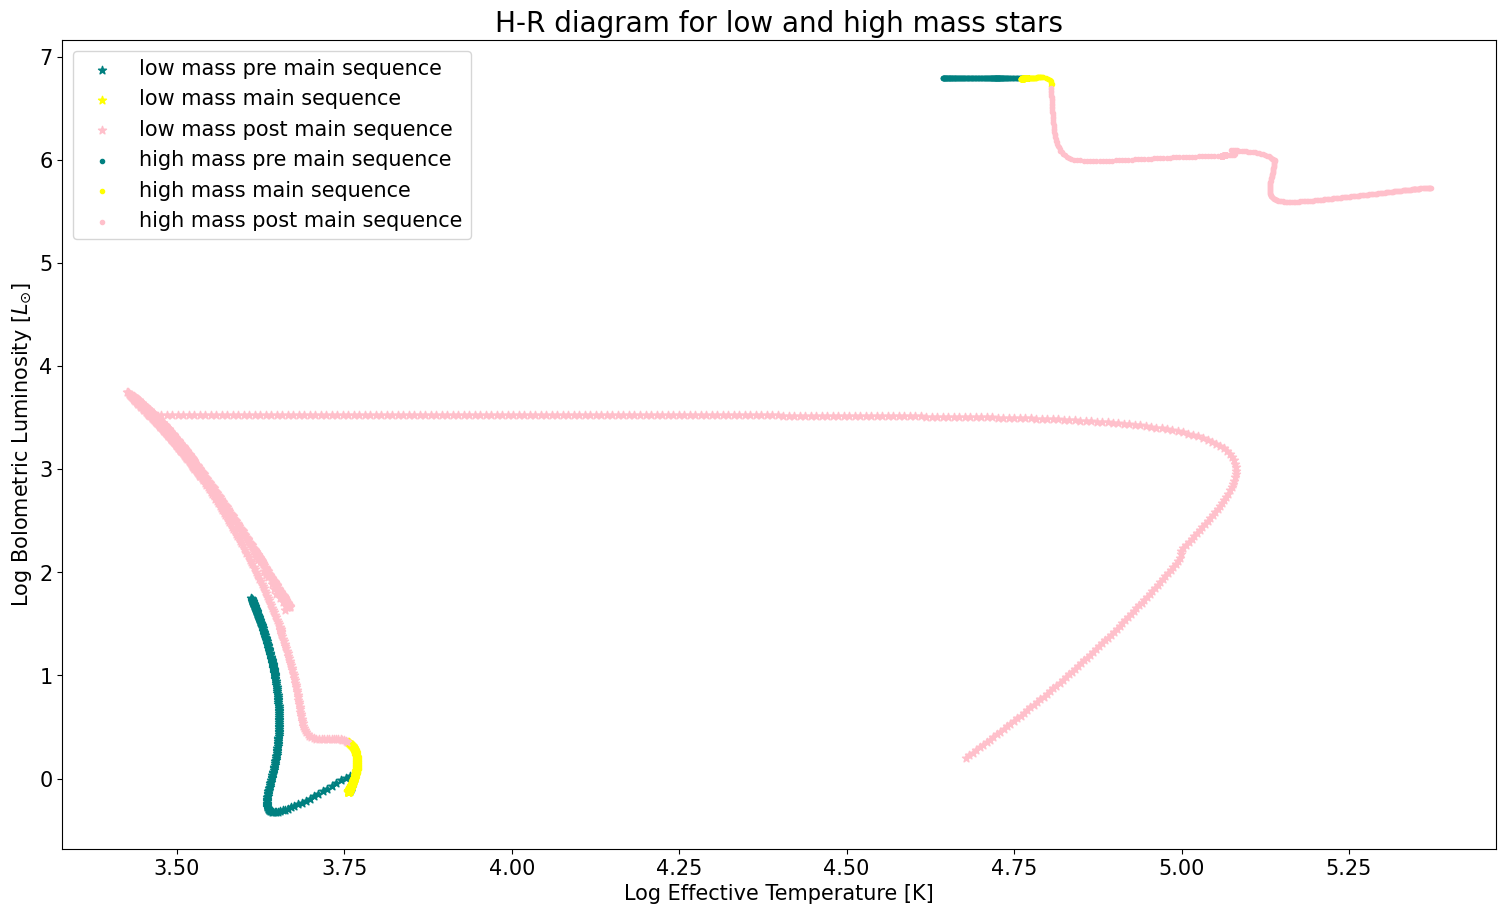

In [12]:
fig, ax = plt.subplots() # this sets up a blank plot and gives us ways to work with it
# fig.set_figwidth(5), fig.set_figheight(5)

# adding data from the low mass pre main sequence into the plot
ax.scatter(low_mass_preMS['log_Teff'], low_mass_preMS['log_L'], marker='*', color='teal', label='low mass pre main sequence')

# adding data from the low mass main sequence into the plot
ax.scatter(low_mass_MS['log_Teff'], low_mass_MS['log_L'], marker='*', color='yellow', label='low mass main sequence')

# adding data from the low mass post main sequence into the plot
ax.scatter(low_mass_postMS['log_Teff'], low_mass_postMS['log_L'], marker='*', color='pink', label='low mass post main sequence')

# adding data from the high mass pre main sequence into the plot
ax.scatter(high_mass_preMS['log_Teff'], high_mass_preMS['log_L'], marker='.', color='teal', label='high mass pre main sequence')

# adding data from the high mass main sequence into the plot
ax.scatter(high_mass_MS['log_Teff'], high_mass_MS['log_L'], marker='.', color='yellow', label='high mass main sequence')

# adding data from the high mass post main sequence into the plot
ax.scatter(high_mass_postMS['log_Teff'], high_mass_postMS['log_L'], marker='.', color='pink', label='high mass post main sequence')

ax.legend(loc='best', fontsize=15) # this adds the legend to the plot at the location it sees fit
fig.set_size_inches(18.5, 10.5) # this sets the size of the plot to help us see the data clearly

# add title and axis labels
ax.set_title('H-R diagram for low and high mass stars', fontsize=20)
ax.set_xlabel('Log Effective Temperature [K]', fontsize=15)
ax.set_ylabel(r'Log Bolometric Luminosity [$L_{\odot}$]', fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=15)
